In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high=189.000, size = 1500)
lats_lngs = zip(lats,lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
#6.2.6 Get the city weather data

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=83716d670c9e48ca1883f79ac15548f4


In [8]:
# Create an empty list to hold the weather data.
#city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
#record_count = 1
#set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in our list.
#for i in range(len(cities)):
#    # Group cities in sets of 50 for logging purposes
#    if(i % 50 == 0 and i > 50):
#        set_count +=1
#        record_count +=1
#    # Create endpoint URL with each city.
#    city_url = url +"&q="=cities[i]
    
        
    

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | klaksvik
Processing Record 5 of Set 1 | nanortalik
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | gurgan
City not found. Skipping...
Processing Record 12 of Set 1 | beyneu
Processing Record 13 of Set 1 | belmonte
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | teya
Processing Record 16 of Set 1 | macheng
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1

Processing Record 38 of Set 4 | aykhal
Processing Record 39 of Set 4 | ponta delgada
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | vangaindrano
Processing Record 42 of Set 4 | saint andrews
Processing Record 43 of Set 4 | lucapa
Processing Record 44 of Set 4 | agadir
Processing Record 45 of Set 4 | adrar
Processing Record 46 of Set 4 | kracheh
City not found. Skipping...
Processing Record 47 of Set 4 | jumla
Processing Record 48 of Set 4 | sumbuya
Processing Record 49 of Set 4 | nanded
City not found. Skipping...
Processing Record 50 of Set 4 | gat
Processing Record 1 of Set 5 | taoudenni
Processing Record 2 of Set 5 | bargal
City not found. Skipping...
Processing Record 3 of Set 5 | ust-maya
Processing Record 4 of Set 5 | pevek
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | kropotkin
Processing Record 7 of Set 5 | agadez
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | la ronge
Processin

City not found. Skipping...
Processing Record 25 of Set 8 | flinders
Processing Record 26 of Set 8 | gambela
Processing Record 27 of Set 8 | bogande
Processing Record 28 of Set 8 | kwinana
Processing Record 29 of Set 8 | sechura
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | lompoc
Processing Record 32 of Set 8 | khonuu
City not found. Skipping...
Processing Record 33 of Set 8 | hamilton
Processing Record 34 of Set 8 | ulladulla
Processing Record 35 of Set 8 | zabaykalsk
Processing Record 36 of Set 8 | jalu
Processing Record 37 of Set 8 | gawler
Processing Record 38 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 39 of Set 8 | vila franca do campo
Processing Record 40 of Set 8 | halalo
City not found. Skipping...
Processing Record 41 of Set 8 | mehamn
Processing Record 42 of Set 8 | fort frances
Processing Record 43 of Set 8 | brigantine
Processing Record 44 of Set 8 | presidencia roque saenz pena
Processing Record 45 of Set 8 | nhulunbuy
Proc

Processing Record 12 of Set 12 | dodge city
Processing Record 13 of Set 12 | macaubas
Processing Record 14 of Set 12 | hami
Processing Record 15 of Set 12 | rio grande
Processing Record 16 of Set 12 | tulsipur
Processing Record 17 of Set 12 | marcona
City not found. Skipping...
Processing Record 18 of Set 12 | carlagan
Processing Record 19 of Set 12 | ostersund
Processing Record 20 of Set 12 | neiafu
Processing Record 21 of Set 12 | ucluelet
Processing Record 22 of Set 12 | angoche
Processing Record 23 of Set 12 | cananea
Processing Record 24 of Set 12 | santa cruz cabralia
Processing Record 25 of Set 12 | santa fe
Processing Record 26 of Set 12 | kholm-zhirkovskiy
Processing Record 27 of Set 12 | verkhoyansk
Processing Record 28 of Set 12 | kongoussi
Processing Record 29 of Set 12 | talnakh
Processing Record 30 of Set 12 | cockburn town
Processing Record 31 of Set 12 | pasco
Processing Record 32 of Set 12 | lake city
Processing Record 33 of Set 12 | mahanoro
Processing Record 34 of Se

In [11]:
len(city_data)

561

In [12]:
#6.2.7 Create the DataFrame of City Weather Data

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tiksi,71.6872,128.8694,-15.34,98,98,1.52,RU,2022-03-14 02:30:27
1,Bethel,41.3712,-73.4140,28.65,72,20,5.75,US,2022-03-14 02:30:28
2,San Patricio,28.0170,-97.5169,64.26,77,84,8.52,US,2022-03-14 02:30:28
3,Klaksvik,62.2266,-6.5890,45.52,94,65,14.56,FO,2022-03-14 02:30:28
4,Nanortalik,60.1432,-45.2371,29.41,92,100,19.73,GL,2022-03-14 02:30:29
5,Hilo,19.7297,-155.0900,78.53,72,100,12.66,US,2022-03-14 02:27:21
6,Hithadhoo,-0.6000,73.0833,82.89,71,100,4.43,MV,2022-03-14 02:30:29
7,Mount Gambier,-37.8333,140.7667,76.91,61,100,9.22,AU,2022-03-14 02:30:29
8,Chokurdakh,70.6333,147.9167,-4.54,86,100,4.83,RU,2022-03-14 02:30:30
9,Beyneu,45.3167,55.2000,29.32,77,100,8.21,KZ,2022-03-14 02:30:30


In [14]:
# Reorder Column Heading
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tiksi,RU,2022-03-14 02:30:27,71.6872,128.8694,-15.34,98,98,1.52
1,Bethel,US,2022-03-14 02:30:28,41.3712,-73.4140,28.65,72,20,5.75
2,San Patricio,US,2022-03-14 02:30:28,28.0170,-97.5169,64.26,77,84,8.52
3,Klaksvik,FO,2022-03-14 02:30:28,62.2266,-6.5890,45.52,94,65,14.56
4,Nanortalik,GL,2022-03-14 02:30:29,60.1432,-45.2371,29.41,92,100,19.73
...,...,...,...,...,...,...,...,...,...
556,Ransang,PH,2022-03-14 02:33:01,8.9603,117.5828,85.89,67,93,3.80
557,Takoradi,GH,2022-03-14 02:33:01,4.8845,-1.7554,76.50,85,100,6.40
558,Santa Rosa Del Sur,CO,2022-03-14 02:33:01,7.9644,-74.0544,69.10,91,76,2.80
559,Bilma,NE,2022-03-14 02:33:02,18.6853,12.9164,61.70,15,0,11.39


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# 6.3 Plot the Weather Data

In [18]:
# 6.3.1 Plot Latitude vs Temperature

In [19]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


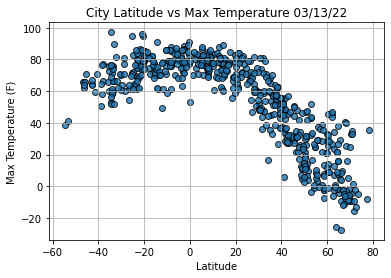

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidth=1,
            marker = "o",
            alpha = 0.8,
            label ="Cities")

# Incorporate the other graph properties

plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()            
            
           

In [21]:
# 6.3.2 Plot Latitude vs Humidity

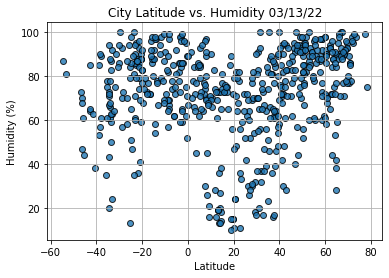

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [23]:
# 6.3.3 Plot Latitude vs Cloudiness

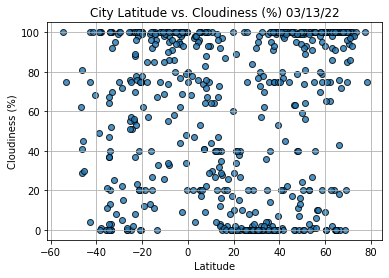

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [25]:
# 6.3.4 Plot Latitude vs Wind Speed

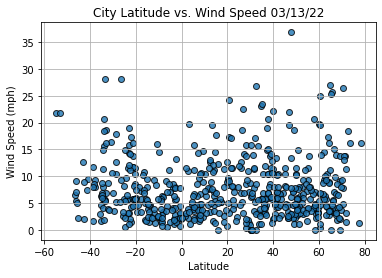

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# 6.4 Determine Corrrelations

In [28]:
# 6.4.1 - Use Linear Regression to Find the Relationship Between Variables --this was done in the random numbers notebook

In [29]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

In [ ]:
city_data_df["Lat"] >= 0

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [ ]:
# Linear regression on the Sourthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
#6.4.3 Find the Correlation Between Latitude and Percent Humidity

In [ ]:
# Linear regression for % Humidity on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', 'Humidity',(40,10))

In [ ]:
# Linear regression for % Humidity on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', 'Humidity',(-50,15))

In [ ]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

In [ ]:
# Linear regression for % Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))



In [ ]:
# 6.4.5 Find the Correlation Between Latitude and Wind Speed

In [ ]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,23))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,16))